In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/loan_sanction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [4]:
df.shape

(981, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [6]:
le=LabelEncoder()
le.fit(df[ 'Gender' ])
df['Gender'] = le.transform (df[ 'Gender' ])
''' Male = 1, Female = 0 '''

le.fit(df[ 'Education' ])
df['Education'] = le.transform (df[ 'Education' ])
''' Graduate = 0, Not Graduate = 1 '''

le.fit(df[ 'Self_Employed' ])
df['Self_Employed'] = le.transform (df[ 'Self_Employed' ])

le.fit(df[ 'Property_Area' ])
df['Property_Area'] = le.transform (df[ 'Property_Area' ])

le.fit(df[ 'Married' ])
df['Married'] = le.transform (df[ 'Married' ])

le.fit(df[ 'Loan_Status' ])
df['Loan_Status'] = le.transform (df[ 'Loan_Status' ])

In [7]:
df = df.drop('Loan_ID', axis=1)
df = df.drop('Dependents', axis=1)


GENDER: Female = 0, Male = 1,

EDUCATION: Graduate = 0, Not Graduate = 1

SELF_EMPLOYED: No = 0, Yes = 1

MARRIED: No = 0, Yes = 1

PROPERTY_AREA: Rural = 0, Semiurban = 1, Urban = 2

LOAN_STATUS: N = 0, Y = 1


In [8]:
df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Education          981 non-null    int64  
 3   Self_Employed      981 non-null    int64  
 4   ApplicantIncome    981 non-null    int64  
 5   CoapplicantIncome  981 non-null    float64
 6   LoanAmount         954 non-null    float64
 7   Loan_Amount_Term   961 non-null    float64
 8   Credit_History     902 non-null    float64
 9   Property_Area      981 non-null    int64  
 10  Loan_Status        981 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 84.4 KB


In [10]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000,981.000000
mean,0.838940,0.649337,0.222222,0.233435,5179.795107,1601.916330,142.511530,342.201873,0.835920,1.053007,1.178389
std,0.429229,0.483790,0.415952,0.539788,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.801302,0.733862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000,2.000000,2.000000
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,2.000000


In [11]:
df.isnull()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
976,False,False,False,False,False,False,False,False,False,False,False
977,False,False,False,False,False,False,False,False,False,False,False
978,False,False,False,False,False,False,False,False,True,False,False
979,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df["Married"].fillna("0.9", inplace = True)
df["LoanAmount"].fillna("147", inplace = True)
df["Loan_Amount_Term"].fillna("342", inplace = True)
df["Credit_History"].fillna("0.9", inplace = True)
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

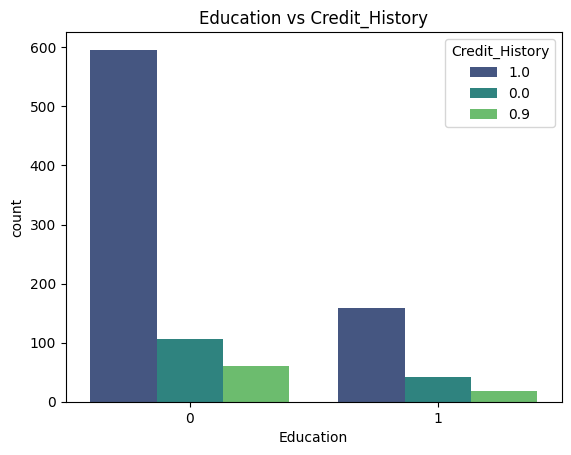

In [13]:
sns.countplot(x='Education', hue='Credit_History', data=df, palette='viridis')
plt.title('Education vs Credit_History')
plt.show()

<ipython-input-14-ad80084067c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

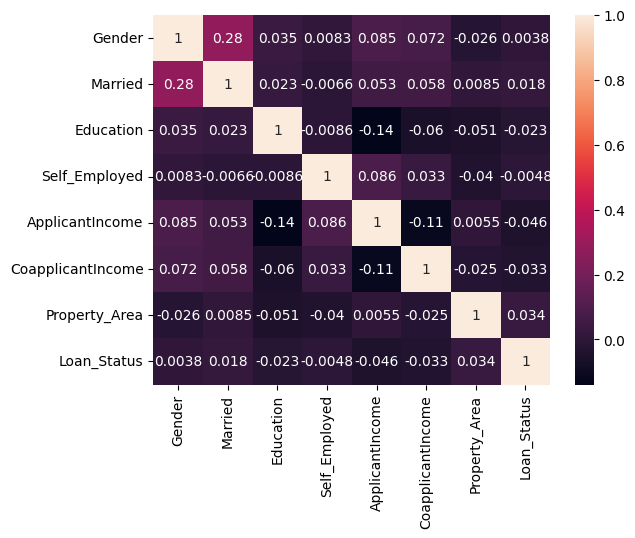

In [14]:
sns.heatmap(df.corr(),annot = True)
sns

([<matplotlib.patches.Wedge at 0x7dfb72ba5ae0>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate'),
  Text(0.8514262161117524, -0.6964721089301593, 'Not_graduate')])

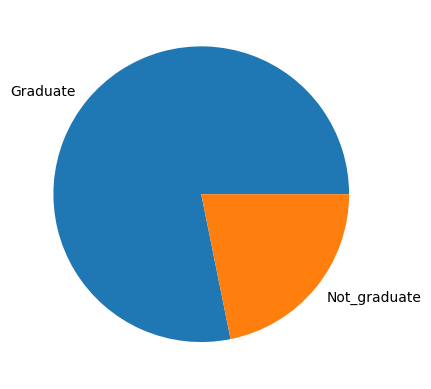

In [15]:
df['Education'].value_counts()
h=[480,134]
labels=('Graduate','Not_graduate')

plt.pie(h,labels=labels)

([<matplotlib.patches.Wedge at 0x7dfb72be3f40>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semiurban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')])

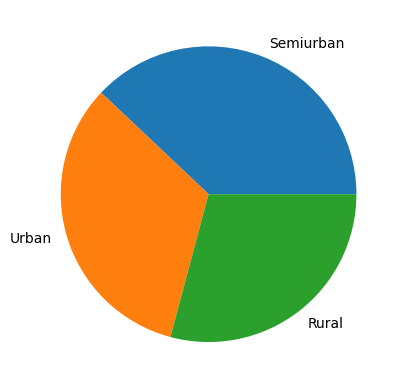

In [16]:
g=df['Property_Area'].value_counts()
g
h=[233,202,179]
labels=('Semiurban','Urban','Rural')

plt.pie(h,labels=labels)

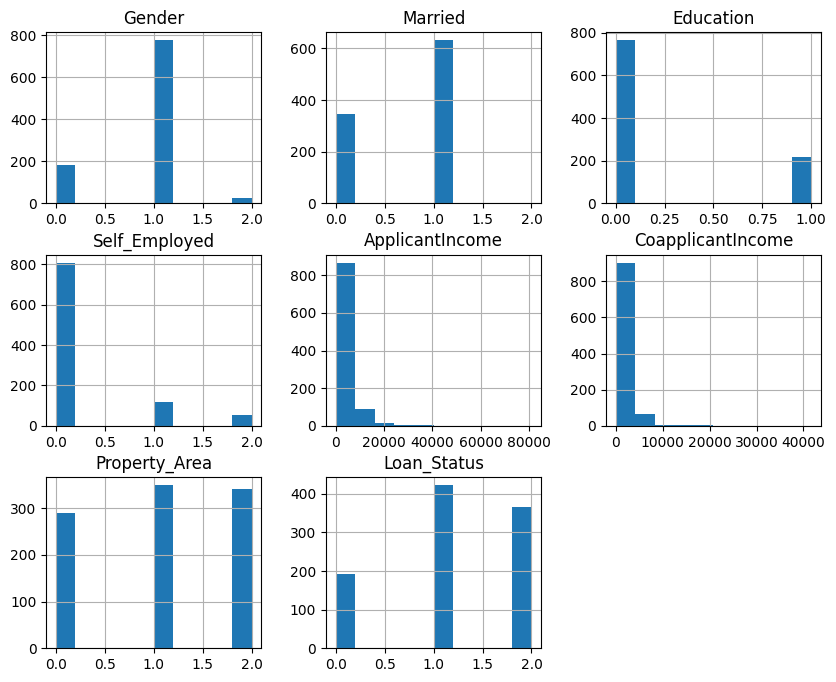

In [17]:
df.hist(figsize=(10,8),bins = 10)
plt.title("Features Distribution")
plt.show()

<ipython-input-18-ebd132bfd3db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Self_Employed'])


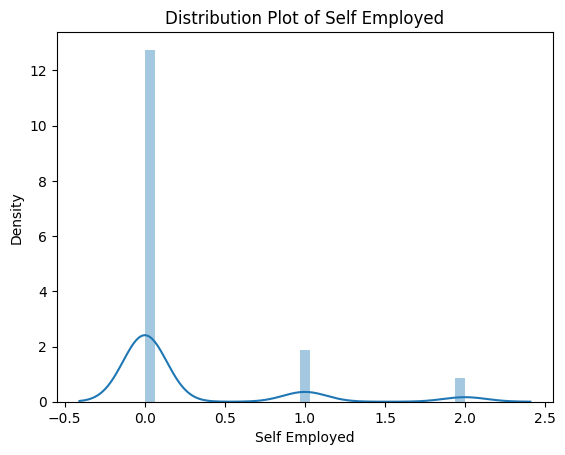

In [18]:
sns.distplot(df['Self_Employed'])
plt.xlabel('Self Employed')
plt.ylabel('Density')
plt.title('Distribution Plot of Self Employed')
plt.show()

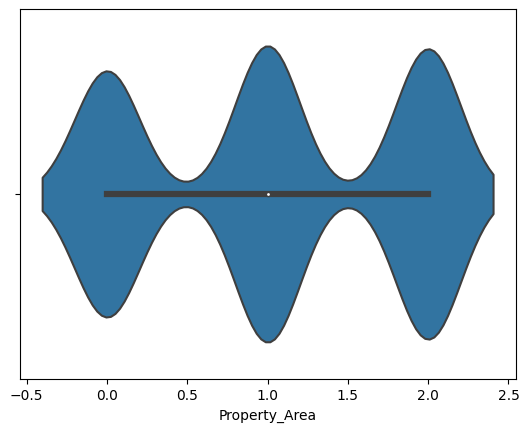

In [19]:
sns.violinplot(x='Property_Area', data=df)
plt.show()

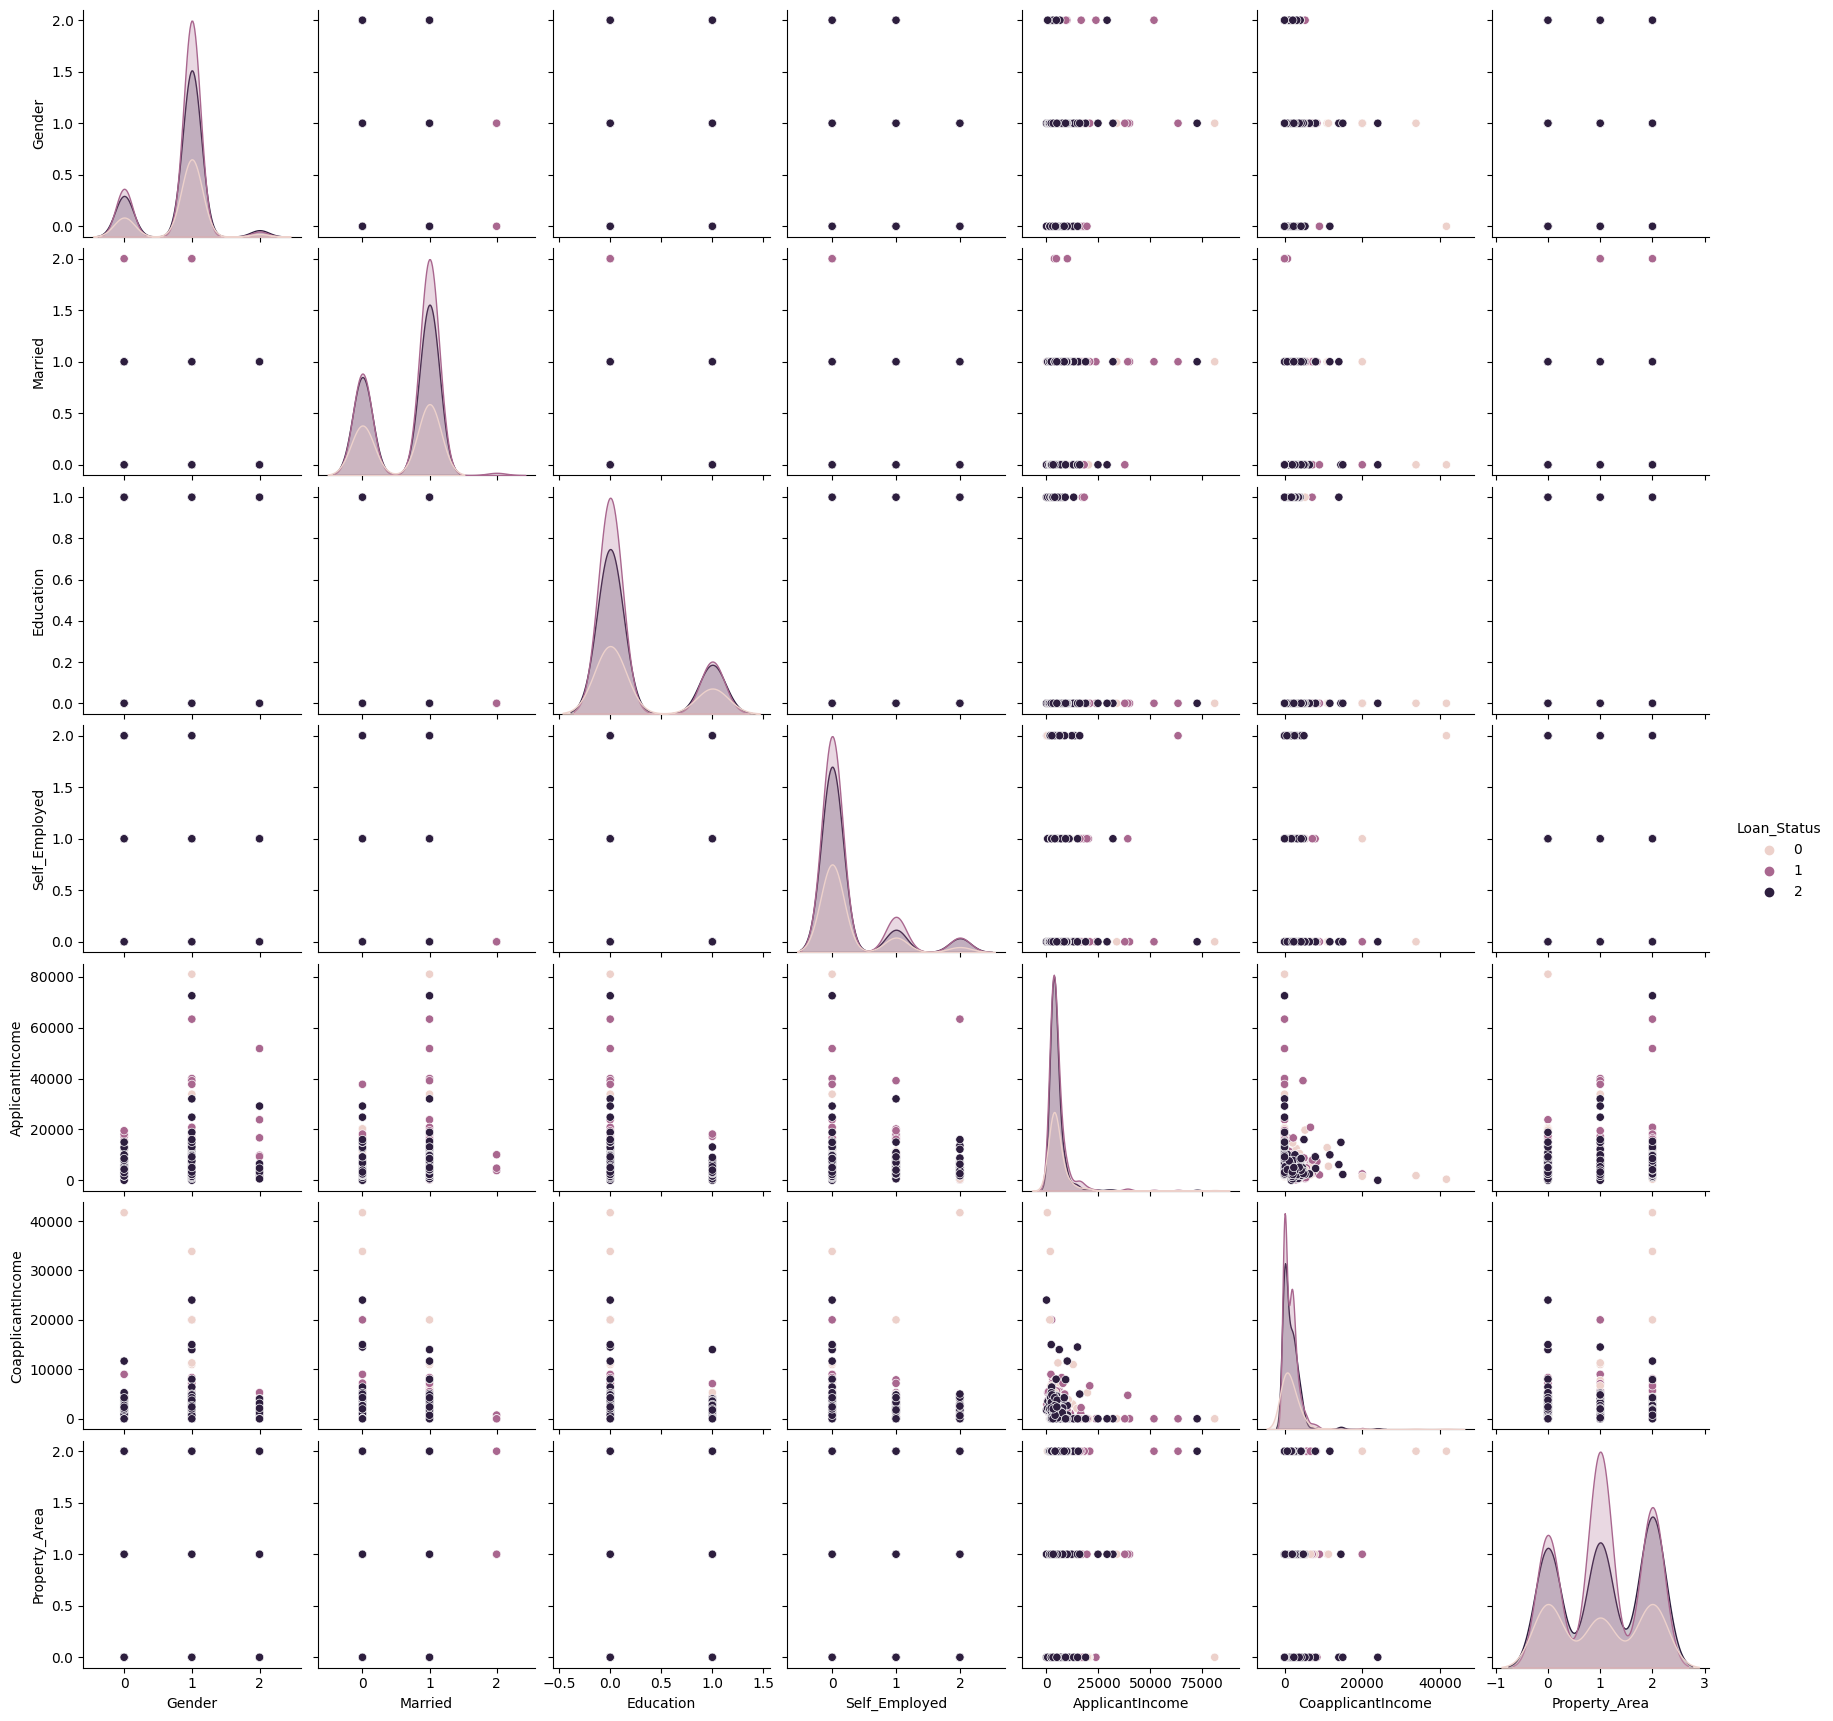

In [20]:
sns.pairplot(df, hue='Loan_Status')
plt.show()

<ipython-input-21-651e2e1dd5e9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CoapplicantIncome'], shade=True)


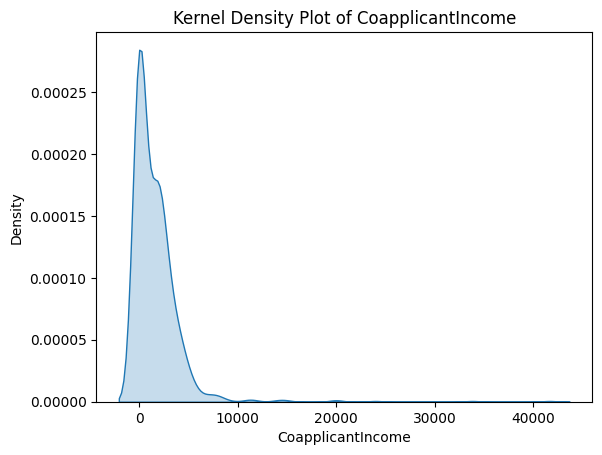

In [21]:
sns.kdeplot(df['CoapplicantIncome'], shade=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Density')
plt.title('Kernel Density Plot of CoapplicantIncome')
plt.show()

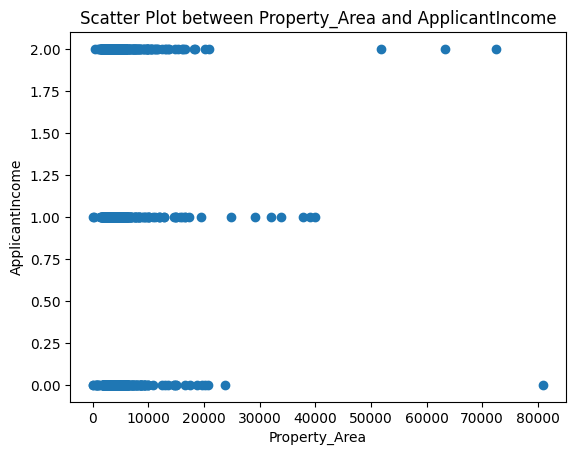

In [22]:
plt.scatter(df['ApplicantIncome'], df['Property_Area'])
plt.xlabel('Property_Area')
plt.ylabel('ApplicantIncome')
plt.title('Scatter Plot between Property_Area and ApplicantIncome')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.6% of the points cannot be plac

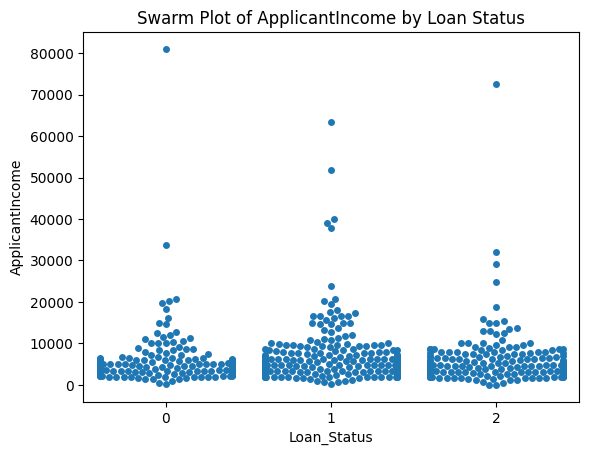

In [23]:
sns.swarmplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Swarm Plot of ApplicantIncome by Loan Status')
plt.show()

In [24]:
x=df[['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y=df[['Loan_Status']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=42)

In [27]:
x_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
342,1,1,1,0,4554,1229.0,158.0,360.0,1.0,2
299,1,1,0,0,2014,2925.0,113.0,360.0,1.0,2
430,0,0,0,1,8624,0.0,150.0,360.0,1.0,1
548,0,0,0,0,5000,0.0,103.0,360.0,0.0,1
896,0,0,0,0,5530,0.0,135.0,360.0,0.9,2
...,...,...,...,...,...,...,...,...,...,...
106,1,1,0,0,11417,1126.0,225.0,360.0,1.0,2
270,0,0,0,0,3237,0.0,30.0,360.0,1.0,2
860,1,1,0,1,5000,2166.0,150.0,360.0,1.0,2
435,0,2,0,0,10047,0.0,147,240.0,1.0,1


In [28]:
x_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
789,1,1,0,2,4912,4614.0,160.0,360.0,1.0,0
497,1,1,0,0,4625,2857.0,111.0,12.0,0.9,2
139,1,1,1,0,4200,1430.0,129.0,360.0,1.0,0
570,1,1,0,0,3417,1750.0,186.0,360.0,1.0,2
66,1,0,1,0,3200,2254.0,126.0,180.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
198,0,1,0,0,3416,2816.0,113.0,360.0,0.9,1
677,0,0,0,0,2101,1500.0,108.0,360.0,0.0,0
110,1,0,0,0,5316,0.0,136.0,360.0,1.0,2
445,1,1,0,1,3466,1210.0,130.0,360.0,1.0,0


In [29]:
ss= StandardScaler()
x_train =ss.fit_transform(x_train)
x_test =ss.fit_transform(x_test)

In [30]:
model_params={
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[10,20,30,40],
            'kernel':['rbf','linear']
        }
    },
    'randomforest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,2,3,5]
        }
    },
    'decisiontree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini']
        }
    },
    'naivebayes':{
        'model':GaussianNB(),
        'params':{}
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,mp in model_params.items():
    GS=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    GS.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':GS.best_score_,
        'best_params':GS.best_params_
        })

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [31]:
print(scores)

NameError: ignored

In [33]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb=nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_pred

array([2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [36]:
y_test

,Loan_Status
789,2
497,1
139,0
570,1
66,0
...,...
198,1
677,2
110,1
445,1


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
print(accuracy_score(y_test,y_pred))

0.47297297297297297


In [39]:
print(confusion_matrix(y_pred,y_test))

[[12  2  8]
 [18 55 44]
 [ 2  4  3]]


In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.38      0.55      0.44        22
           1       0.90      0.47      0.62       117
           2       0.05      0.33      0.09         9

    accuracy                           0.47       148
   macro avg       0.44      0.45      0.39       148
weighted avg       0.77      0.47      0.56       148



In [43]:
Gender= int(input("Gender : "))
Married= int(input("Married : "))
Education= int(input("Education : "))
Self_Employed= int(input("Self_Employed : "))
ApplicantIncome= int(input("ApplicantIncome : "))
CoapplicantIncome= int(input("CoapplicantIncome : "))
LoanAmount= int(input("LoanAmount : "))
Loan_Amount_Term= int(input("Loan_Amount_Term : "))
Credit_History= int(input("Credit_History : "))
Property_Area= int(input("Property_Area : "))
score= ss.transform([[Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]])
nb.predict(score)

Gender : 1
Married : 1
Education : 1
Self_Employed : 1
ApplicantIncome : 5000000
CoapplicantIncome : 10000
LoanAmount : 500000000000
Loan_Amount_Term : 1500
Credit_History : 0
Property_Area : 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])